In [60]:
# Loading library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

dgts = np.loadtxt(os.path.join('./dataset/','digits.csv'),delimiter=',')

cifre = dgts[:, 64]
dgts = dgts[:, 0:64]


numpy.ndarray

In [53]:
U, S, VT = np.linalg.svd(dgts, full_matrices=0)

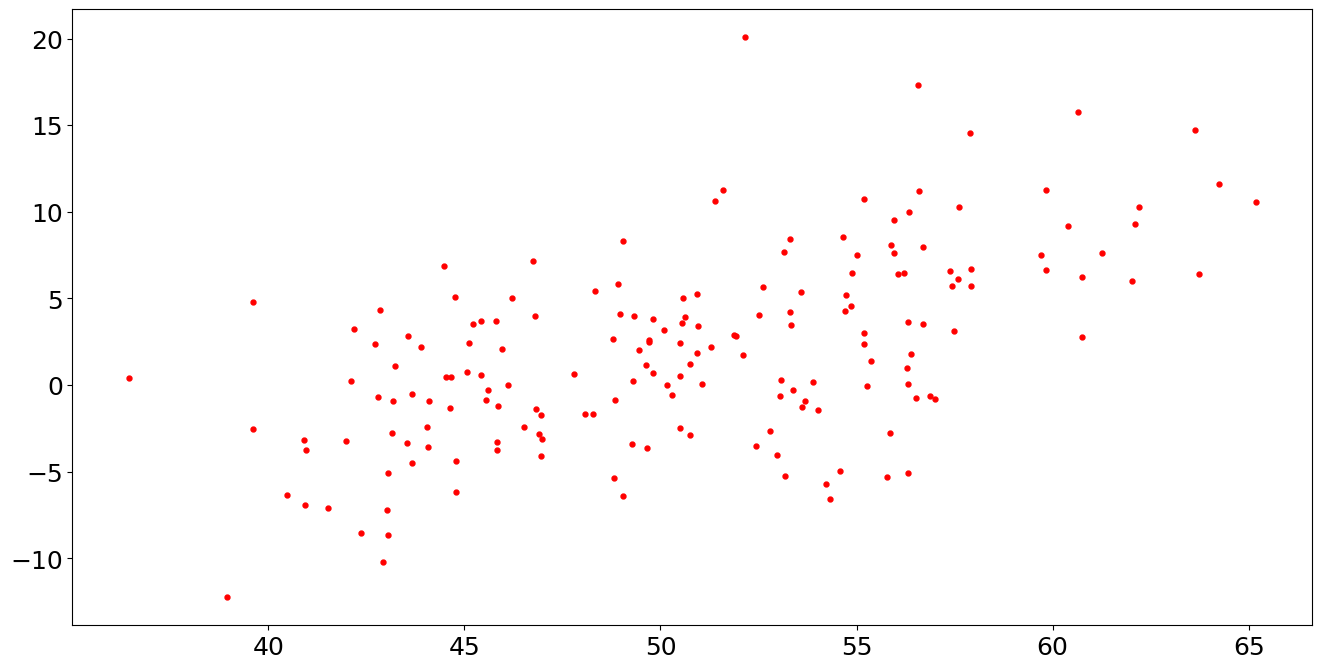

In [63]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)

for j in range(obs.shape[0]):
    x = VT[0, :] @ dgts[j,:].T
    y = VT[1, :] @ dgts[j,:].T

    if cifre[j] == 0:
        ax.scatter(x,y,marker='.',color='b', s=50)
    elif cifre[j] == 1:
        ax.scatter(x, y, marker='.', color='', s=50)   

plt.show()